<a href="https://colab.research.google.com/github/AlisileAnusri/Gamma_Ray_Classification/blob/Anu/Gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
data=pd.read_csv('/gamma.csv')

In [6]:
data.head(5)

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [63]:
data.drop('Unnamed: 0',inplace=True,axis=1)

In [9]:
data.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


In [10]:
print('(Row,Col)',data.shape) 
print('Null sum')
print(data.isna().sum())

(Row,Col) (19020, 11)
Null sum
fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64


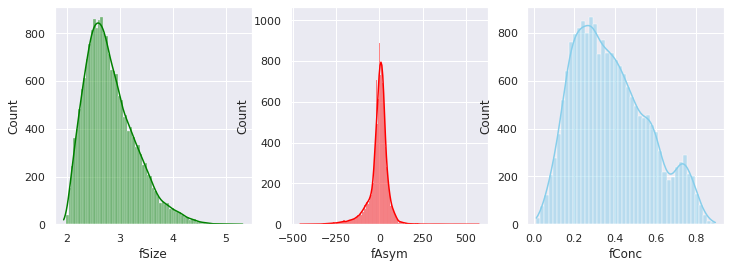

In [31]:
    sns.set(style="darkgrid")
    fig,axs=plt.subplots(1,3,figsize=(12,4))
    sns.histplot(data=data,x="fSize",kde=True,ax=axs[0],color='green')
    sns.histplot(data=data,x="fAsym",kde=True,ax=axs[1],color='red')
    sns.histplot(data=data,x="fConc",kde=True,ax=axs[2],color='skyblue')
    

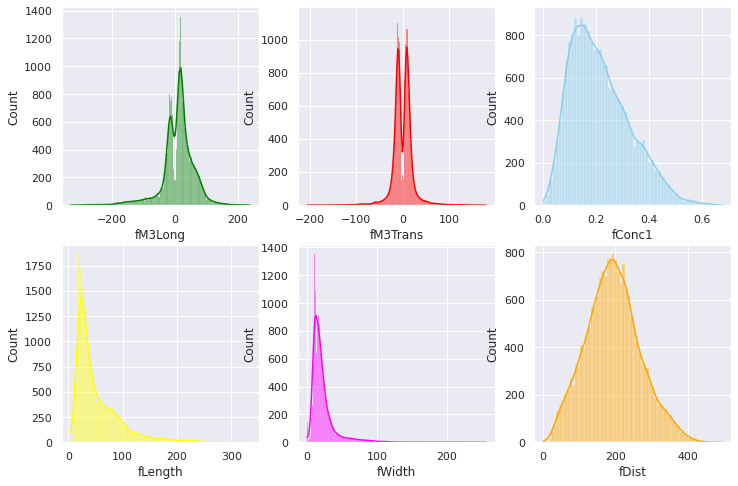

In [30]:
    sns.set(style="darkgrid")
    fig,axs=plt.subplots(2,3,figsize=(12,8))
    sns.histplot(data=data,x="fM3Long",kde=True,ax=axs[0,0],color='green')
    sns.histplot(data=data,x="fM3Trans",kde=True,ax=axs[0,1],color='red')
    sns.histplot(data=data,x="fConc1",kde=True,ax=axs[0,2],color='skyblue')
    sns.histplot(data=data,x="fLength",kde=True,ax=axs[1,0],color='yellow')
    sns.histplot(data=data,x="fWidth",kde=True,ax=axs[1,1],color='magenta')
    sns.histplot(data=data,x="fDist",kde=True,ax=axs[1,2],color='orange')

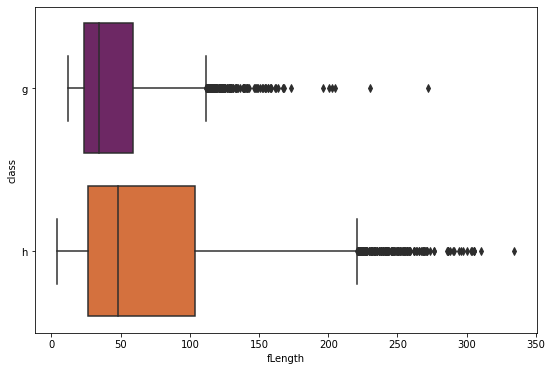

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot("fLength","class",data=data,palette="inferno")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


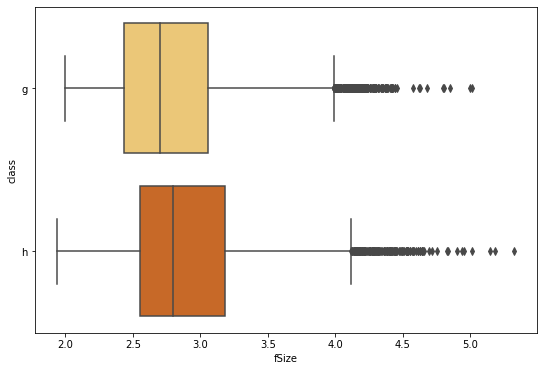

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot("fSize","class",data=data,palette="YlOrBr")

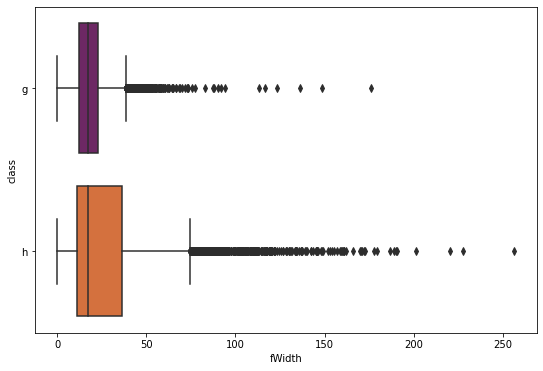

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot("fWidth","class",data=data,palette="inferno")

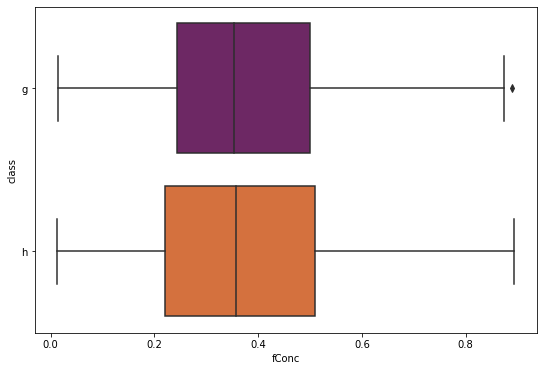

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot("fConc","class",data=data,palette="inferno")

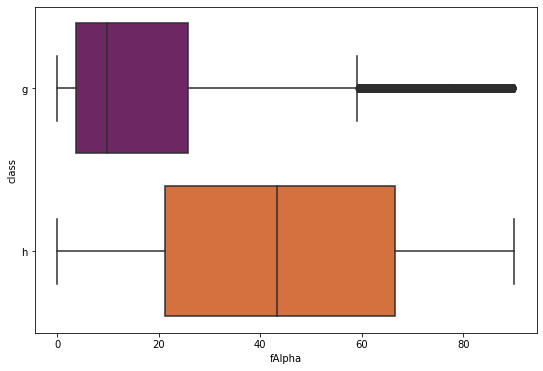

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot("fAlpha","class",data=data,palette="inferno")

In [32]:
from sklearn.preprocessing import LabelEncoder

In [64]:
lc=LabelEncoder()
data['class']=lc.fit_transform(data['class'])
dic={}
for k in range(len(lc.classes_)):
  dic[lc.classes_[k]]= lc.transform(lc.classes_)[k]
print(dic)

{'g': 0, 'h': 1}


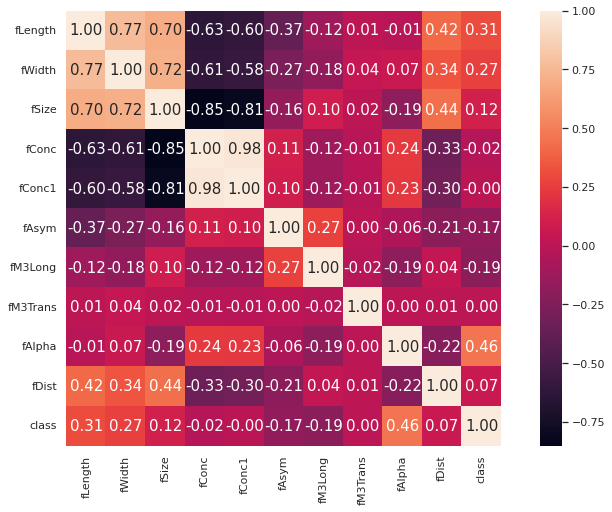

In [34]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),
              cbar=True,
              annot=True,square=True,fmt='.2f',annot_kws={'size':15},
              )

In [65]:
data.drop('fM3Trans',inplace=True,axis=1)
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,4.6480,356.4620,0


In [36]:
data.drop('fM3Long',inplace=True,axis=1)
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,4.6480,356.4620,0


In [71]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [72]:
X=data.iloc[:,0:-1].values
Y=data.iloc[:,-1].values
print(Y[1])

0


In [126]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.25)

In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [135]:
classifier1 = RandomForestClassifier(n_estimators = 100,criterion='entropy')
classifier1.fit(x_train,y_train)
c1_pred=classifier1.predict(x_test)
print('____________Random forest classifier____________')
print('\nAccuracy:{:.2f}%'.format((accuracy_score(y_test,c1_pred)*100)))
print('F1 score:{:.2f}'.format(f1_score(y_test,c1_pred)))
print('Recall :{:.2f}'.format(recall_score(y_test,c1_pred)))
print('Precision:{:.2f}'.format(precision_score(y_test,c1_pred)))
cm= confusion_matrix(y_test,c1_pred)
print('Confusion matrix')
print(cm)

____________Random forest classifier____________

Accuracy:87.38%
F1 score:0.75
Recall :0.68
Precision:0.84
Confusion matrix
[[2741  142]
 [ 363  756]]


In [131]:
classifier2 = SVC()
classifier2.fit(x_train,y_train)
c2_pred=classifier2.predict(x_test)
print('___________SVC___________')
print('\nAccuracy:{:.2f}%'.format((accuracy_score(y_test,c2_pred)*100)))
print('F1 score:{:.2f}'.format(f1_score(y_test,c2_pred)))
print('Recall :{:.2f}'.format(recall_score(y_test,c2_pred)))
print('Precision:{:.2f}'.format(precision_score(y_test,c2_pred)))
print('Confusion matrix')
cm= confusion_matrix(y_test,c2_pred)
print(cm)

___________SVC___________

Accuracy:87.23%
F1 score:0.73
Recall :0.62
Precision:0.89
Confusion matrix
[[2794   89]
 [ 422  697]]


In [130]:
classifier3 = KNeighborsClassifier()
classifier3.fit(x_train,y_train)
c3_pred=classifier3.predict(x_test)
print('___________KNN__________')
print('\nAccuracy:{:.2f}%'.format((accuracy_score(y_test,c3_pred)*100)))
print('F1 score:{:.2f}'.format(f1_score(y_test,c3_pred)))
print('Recall :{:.2f}'.format(recall_score(y_test,c3_pred)))
print('Precision:{:.2f}'.format(precision_score(y_test,c3_pred)))
print('Confusion matrix')
cm= confusion_matrix(y_test,c3_pred)
print(cm)

___________KNN__________

Accuracy:83.93%
F1 score:0.66
Recall :0.55
Precision:0.82
Confusion matrix
[[2748  135]
 [ 508  611]]


In [129]:
classifier4 = LogisticRegression()
classifier4.fit(x_train,y_train)
c4_pred=classifier4.predict(x_test)
print('__________Logistic Regression________')
print('\nAccuracy:{:.2f}%'.format((accuracy_score(y_test,c4_pred)*100)))
print('Confusion matrix')
cm= confusion_matrix(y_test,c4_pred)
print(cm)
print('F1 score:{:.2f}'.format(f1_score(y_test,c4_pred)))
print('Recall :{:.2f}'.format(recall_score(y_test,c4_pred)))
print('Precision:{:.2f}'.format(precision_score(y_test,c4_pred)))

__________Logistic Regression________

Accuracy:79.69%
Confusion matrix
[[2666  217]
 [ 596  523]]
F1 score:0.56
Recall :0.47
Precision:0.71


In [86]:
classifier5 = DecisionTreeClassifier(criterion='entropy', 
                               max_depth=10)
classifier5.fit(x_train,y_train)
c5_pred=classifier5.predict(x_test)
print('__________Decision tree clssifier__________')
print('\nAccuracy:{:.2f}%'.format((accuracy_score(y_test,c5_pred)*100)))
print('F1 score:{:.2f}'.format(f1_score(y_test,c5_pred)))
print('Recall :{:.2f}'.format(recall_score(y_test,c5_pred)))
print('Precision:{:.2f}'.format(precision_score(y_test,c5_pred)))
print('Confusion matrix')
cm= confusion_matrix(y_test,c5_pred)
print(cm)

__________Decision tree clssifier__________

Accuracy:83.08%
F1 score:0.65
Recall :0.55
Precision:0.79
Confusion matrix
[[2701  170]
 [ 507  624]]


In [87]:
from sklearn.model_selection import cross_validate

In [136]:
_scoring = ['accuracy', 'precision', 'recall', 'f1']
result=cross_validate(estimator=classifier1,
                               X=X,
                               y=Y,
                               cv=10,
                               scoring=_scoring,
                               return_train_score=True)
print('Train accuracy: ',result['train_accuracy'])
print('Test accuracy: ',result['test_accuracy'])
print('_________________________________________')
print('Train f1: ',result['train_f1'])
print('Test f1: ',result['test_f1'])
print('_________________________________________')
print('Train precision: ',result['train_precision'])
print('Test precision: ',result['test_precision'])
print('_________________________________________')
print('Train recall: ',result['train_recall'])
print('Test recall: ',result['test_recall'])


Train accuracy:  [0.99986118 1.         1.         1.         0.99993059 1.
 1.         1.         1.         1.        ]
Test accuracy:  [0.8700812  0.87445347 0.8763273  0.87570269 0.88257339 0.86820737
 0.86071205 0.88007495 0.88875    0.876875  ]
_________________________________________
Train f1:  [0.9997543  1.         1.         1.         0.99987716 1.
 1.         1.         1.         1.        ]
Test f1:  [0.74257426 0.74906367 0.76484561 0.75279503 0.76847291 0.7378882
 0.7290401  0.76412776 0.78292683 0.75648949]
_________________________________________
Train precision:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test precision:  [0.84269663 0.85959885 0.82564103 0.85835694 0.86666667 0.84375
 0.81081081 0.86149584 0.87228261 0.85714286]
_________________________________________
Train recall:  [0.99950872 1.         1.         1.         0.99975436 1.
 1.         1.         1.         1.        ]
Test recall:  [0.66371681 0.66371681 0.71238938 0.67035398 0.69026549 0.65562914
 0.6622

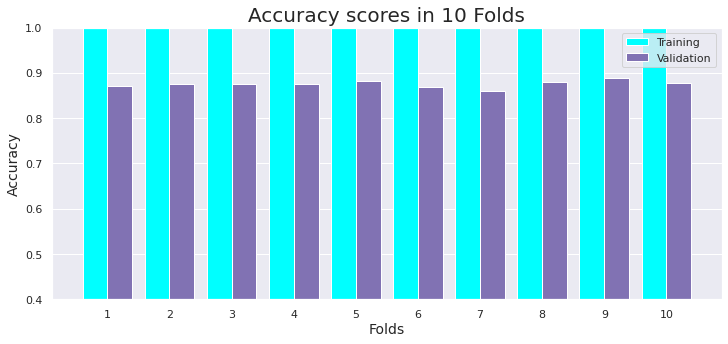

In [137]:
def graph(x_label, y_label, plot_title,train_data,val_data):
  plt.figure(figsize=(12,5))
  labels = ['1','2','3','4','5','6','7','8','9','10']
  X_axis = np.arange(len(labels))
  ax = plt.gca()
  plt.ylim(0.40000, 1)
  plt.bar(X_axis-0.2, train_data, 0.4, color='cyan',label='Training')
  plt.bar(X_axis+0.2, val_data, 0.4, color='m',label='Validation')
  plt.title(plot_title, fontsize=20)
  plt.xticks(X_axis, labels)
  plt.xlabel(x_label, fontsize=14)
  plt.ylabel(y_label, fontsize=14)
  plt.legend()
  plt.grid(True)
  plt.show()

model_name = "Folds"
graph(model_name,
            "Accuracy",
            "Accuracy scores in 10 Folds",
           result['train_accuracy'],result['test_accuracy'])